In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import os


In [4]:
df = pd.read_csv("E:/Year 3/ST 3082/GroupProject_ST 3082/Final Project/Diabetes.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
rs = 73

In [7]:
styled_df = df.head()
styled_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [8]:
[rows,col] = df.shape
print(f"Rows : {rows} \nColumns : {col}")

Rows : 70692 
Columns : 22


In [9]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
df = df.astype(int)

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

In [12]:
## checking for category levels in each variable
# Initialize an empty dictionary to store unique category levels for each variable
unique_levels_dict = {}
# Iterate through each column in the DataFrame
for column in df.columns:
# Get unique category levels for the column
    unique_levels = df[column].unique()
# Store the unique category levels in the dictionary
    unique_levels_dict[column] = unique_levels
# Print the dictionary containing unique category levels for each variable
for variable, levels in unique_levels_dict.items():
    print(f"Variable: {variable}")
    print("Unique category levels:", levels)
    print()

Variable: Diabetes_binary
Unique category levels: [0 1]

Variable: HighBP
Unique category levels: [1 0]

Variable: HighChol
Unique category levels: [0 1]

Variable: CholCheck
Unique category levels: [1 0]

Variable: BMI
Unique category levels: [26 28 29 18 31 32 27 24 21 58 30 20 22 38 40 25 36 47 19 37 41 23 34 35
 42 17 33 44 15 52 69 56 45 39 92 53 98 50 46 79 48 16 63 72 54 49 68 43
 84 73 76 55 51 75 57 60 12 77 82 67 71 61 14 81 59 86 13 87 65 95 89 62
 64 66 85 70 83 80 78 74]

Variable: Smoker
Unique category levels: [0 1]

Variable: Stroke
Unique category levels: [0 1]

Variable: HeartDiseaseorAttack
Unique category levels: [0 1]

Variable: PhysActivity
Unique category levels: [1 0]

Variable: Fruits
Unique category levels: [0 1]

Variable: Veggies
Unique category levels: [1 0]

Variable: HvyAlcoholConsump
Unique category levels: [0 1]

Variable: AnyHealthcare
Unique category levels: [1 0]

Variable: NoDocbcCost
Unique category levels: [0 1]

Variable: GenHlth
Unique category 

In [13]:
# define a function to simplify the plots in further sections
def ida_plot(li_col, row, col=3, figsize=(20, 5)):
    """
    This function return plt subplots by
    looping through the df columns
    display only the desired columns
    """
    # prepare subplot format
    fig, ax = plt.subplots(row, col, figsize=figsize)
    axe = ax.ravel()
    # use for loop to plot
    for i in range(len(li_col)):
    # create bar charts for each column
        sns.countplot(x=df[li_col[i]], ax=axe[i])
    # adjust the spacing of the subplots
    plt.subplots_adjust(
    wspace=0.5,
    hspace=0.5
)

In [14]:
## recarogarizing
## age variable
# Create a mapping dictionary to map original categories to new categories
category_mapping = {
1: 1,
2: 1,
3: 2,
4: 2,
5: 2,
6: 2,
7: 3,
8: 3,
9: 3,
10: 3,
11: 4,
12: 4,
13: 4
}
# Use map function to apply the mapping to the age column
df['Age'] = df['Age'].map(category_mapping)
# Check the result
print(df['Age'].value_counts())

Age
3    36443
4    18864
2    13010
1     2375
Name: count, dtype: int64


In [15]:
## cheching if recategorization is right
unique_levels = df['Age'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels)

Unique category levels: [2 4 3 1]


In [16]:
## recarogarizing
## Education variable
# Create a mapping dictionary to map original categories to new categories
category_mapping2 = {
1: 1,
2: 2,
3: 2,
4: 2,
5: 3,
6: 4
}
# Use map function to apply the mapping to the age column
df['Education'] = df['Education'].map(category_mapping2)
# Check the result
print(df['Education'].value_counts())

Education
4    26020
2    24567
3    20030
1       75
Name: count, dtype: int64


In [17]:
## cheching if recategorization is right
unique_levels2 = df['Education'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels2)

Unique category levels: [4 3 2 1]


In [18]:
## recarogarizing
## Income variable
# Create a mapping dictionary to map original categories to new categories
category_mapping3 = {
1: 1,
2: 1,
3: 1,
4: 1,
5: 2,
6: 2,
7: 3,
8: 4
}
# Use map function to apply the mapping to the age column
df['Income'] = df['Income'].map(category_mapping3)
# Check the result
print(df['Income'].value_counts())

Income
4    20646
1    20324
2    18297
3    11425
Name: count, dtype: int64


In [19]:
## cheching if recategorization is right
unique_levels3 = df['Income'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels3)

Unique category levels: [4 3 2 1]


In [20]:
rs = 73

In [21]:
#[train, test]= train_test_split(df, random_state=rs, train_size = .8)
x=df.drop(columns='Diabetes_binary')
y=df['Diabetes_binary']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.20,stratify=y,random_state=73)

In [22]:
# Assuming df1 is your DataFrame and col_series is your Series (single column)

combined_df = Xtrain.join(Ytrain)
combined_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
54330,1,1,1,34,0,0,0,1,1,1,...,0,3,0,0,0,1,3,3,1,1
61696,1,0,1,43,1,0,1,1,1,1,...,0,5,30,30,0,0,2,2,3,1
53756,1,1,1,38,1,0,1,0,0,1,...,0,4,15,30,1,1,3,2,2,1
31981,0,1,1,21,0,0,0,0,1,1,...,0,2,0,0,0,0,3,4,2,0
34456,0,1,1,30,0,0,0,0,0,0,...,0,3,0,5,0,0,3,3,2,0


In [23]:
Xtrain.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
54330,1,1,1,34,0,0,0,1,1,1,...,1,0,3,0,0,0,1,3,3,1
61696,1,0,1,43,1,0,1,1,1,1,...,1,0,5,30,30,0,0,2,2,3
53756,1,1,1,38,1,0,1,0,0,1,...,1,0,4,15,30,1,1,3,2,2
31981,0,1,1,21,0,0,0,0,1,1,...,1,0,2,0,0,0,0,3,4,2
34456,0,1,1,30,0,0,0,0,0,0,...,1,0,3,0,5,0,0,3,3,2


In [24]:
Xtrain.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [25]:
# To check the structure of the training and testing data is same or not
Ytrain.value_counts(normalize=True) * 100

Diabetes_binary
1    50.000884
0    49.999116
Name: proportion, dtype: float64

In [26]:
# To check the structure of the training and testing data is same or not
Ytest.value_counts(normalize=True) * 100

Diabetes_binary
0    50.003536
1    49.996464
Name: proportion, dtype: float64

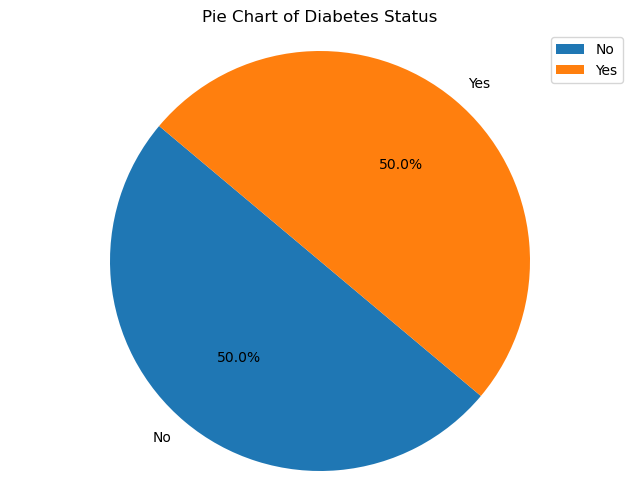

In [27]:
## Descriptive Analysis

# Diabetes Variable
category_counts1 = Ytrain.value_counts()
category_counts1.index = ['No', 'Yes']
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts1, labels=category_counts1.index, autopct='%1.1f%%', startangle=140)
plt.legend(["No","Yes"])
plt.title('Pie Chart of Diabetes Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_Diabetes.png')
plt.show()

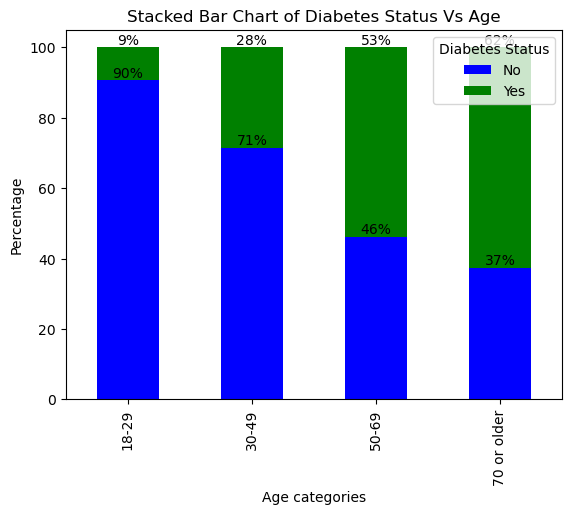

In [29]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['Age','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'green'])

# Add labels and title
plt.xlabel('Age categories')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs Age')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['18-29', '30-49','50-69','70 or older'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

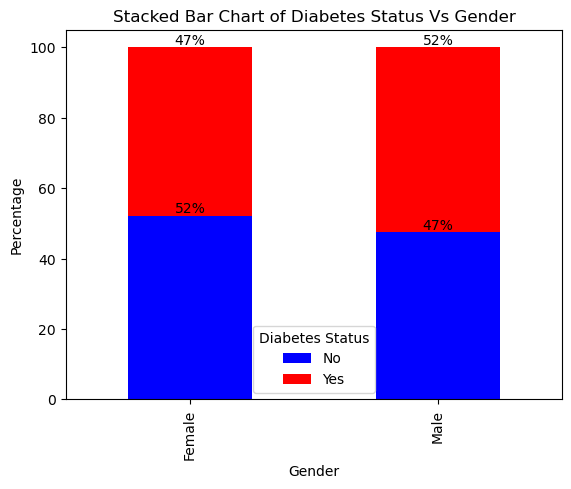

In [31]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['Sex','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs Gender')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['Female', 'Male'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

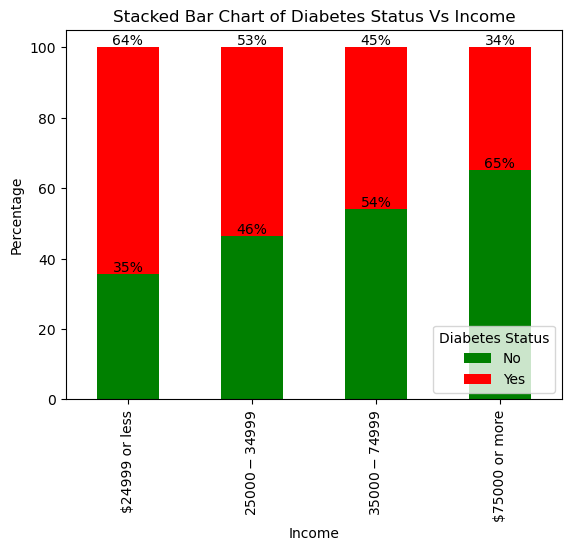

In [33]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['Income','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['green', 'red'])

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs Income')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['$24999 or less', '$25000-$34999','$35000-$74999','$75000 or more'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status',loc = "lower right")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

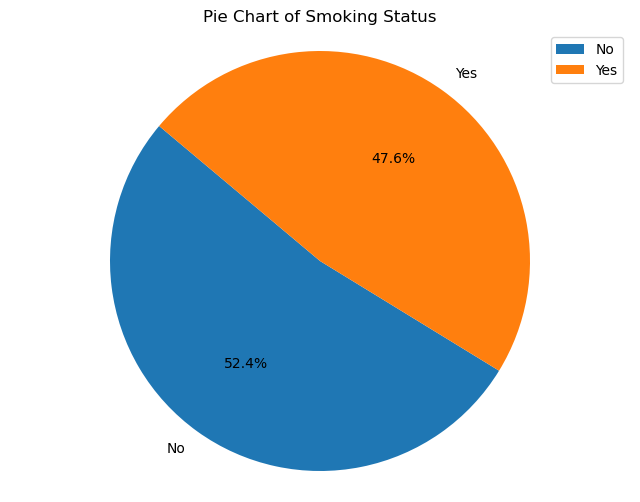

In [34]:
# Smoker 
category_counts5 = Xtrain['Smoker'].value_counts()
category_counts5.index = ['No', 'Yes']
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts5, labels=category_counts5.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Smoking Status')
plt.legend(['No', 'Yes'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_Smoke.png')
plt.show()

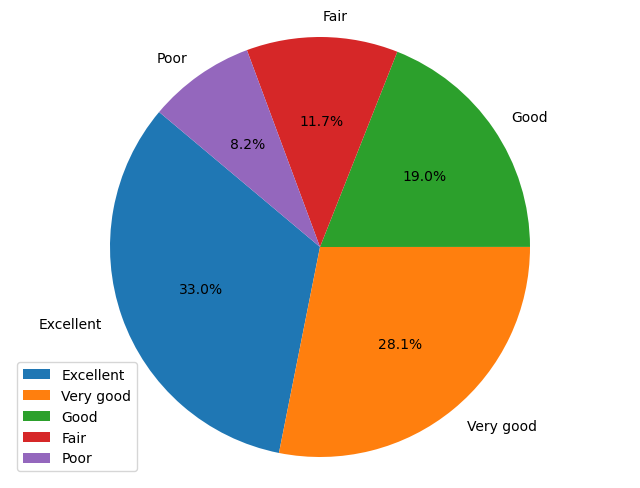

In [35]:
# General health
category_counts6 = Xtrain['GenHlth'].value_counts()
category_counts6.index = ['Excellent', 'Very good','Good','Fair','Poor']
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts6, labels=category_counts6.index, autopct='%1.1f%%', startangle=140)
#plt.title('Pie Chart of General health Status')
plt.legend(['Excellent', 'Very good','Good','Fair','Poor'],loc='lower left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_Stroke.png')
plt.show()

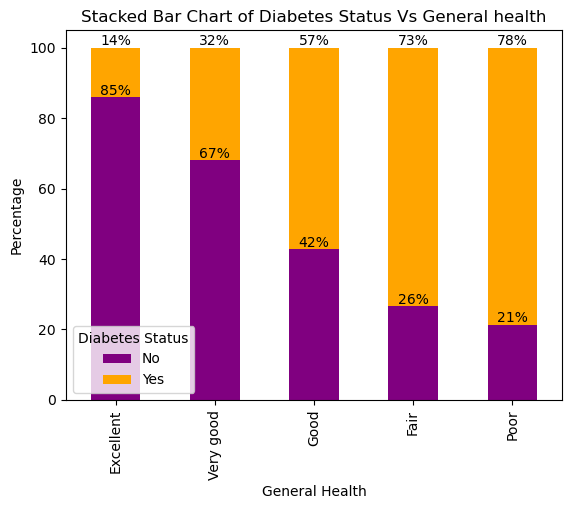

In [36]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['GenHlth','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['purple', 'orange'])

# Add labels and title
plt.xlabel('General Health')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs General health')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['Excellent', 'Very good','Good','Fair','Poor'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status',loc = "lower left")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

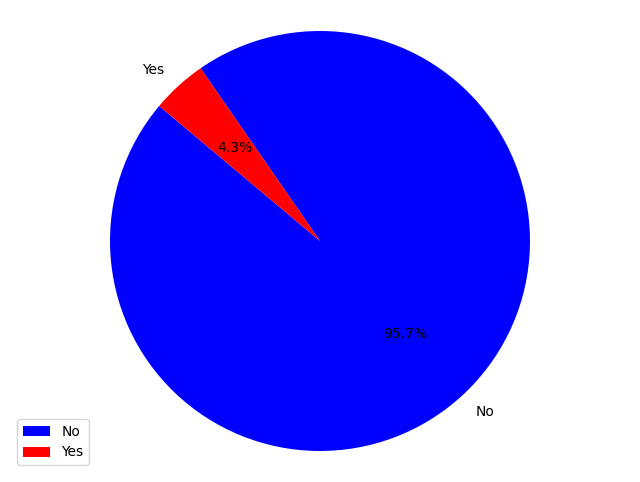

In [37]:
# General health
category_counts6 = Xtrain['HvyAlcoholConsump'].value_counts()
category_counts6.index = ['No', 'Yes']
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts6, labels=category_counts6.index, autopct='%1.1f%%', startangle=140, colors= ['blue','red'])
#plt.title('Pie Chart of General health Status')
plt.legend(['No', 'Yes'],loc='lower left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_Stroke.png')
plt.show()

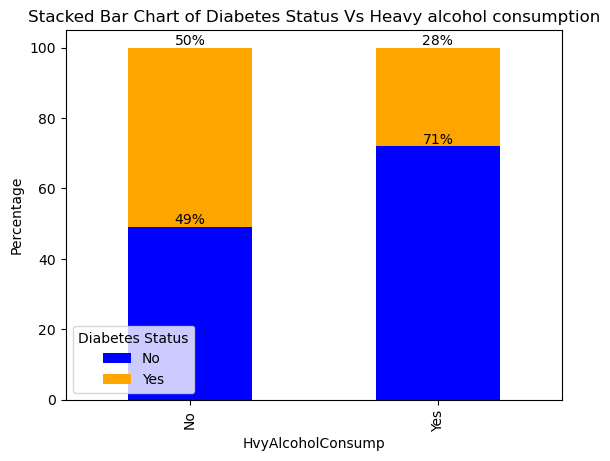

In [38]:
## stacked bar chart
# Group by the two categorical variables and count occurrences
#grouped_df = df1.groupby([X_train['HighBP'],y_train]).size().unstack(fill_value=0)
grouped_df = combined_df.groupby(['HvyAlcoholConsump','Diabetes_binary']).size().unstack(fill_value=0)
# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'orange'])

# Add labels and title
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Diabetes Status Vs Heavy alcohol consumption')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['No', 'Yes'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes Status',loc = "lower left")

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MentHlth', ylabel='Count'>

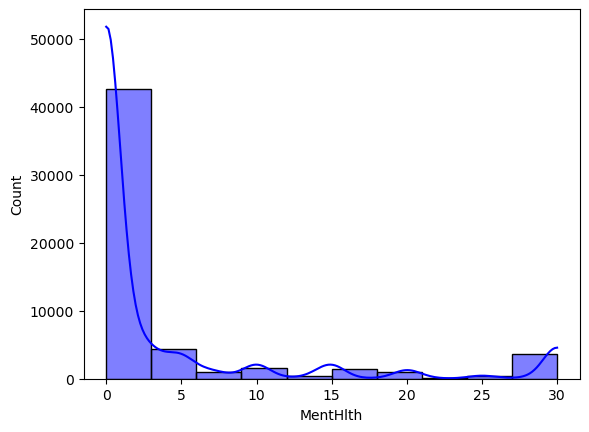

In [39]:
# Histogram for the Mental health issues occurances
sns.histplot(x=Xtrain["MentHlth"], bins=10, kde=True, color='blue', edgecolor='black')

In [40]:
Xtrain.columns


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PhysHlth', ylabel='Count'>

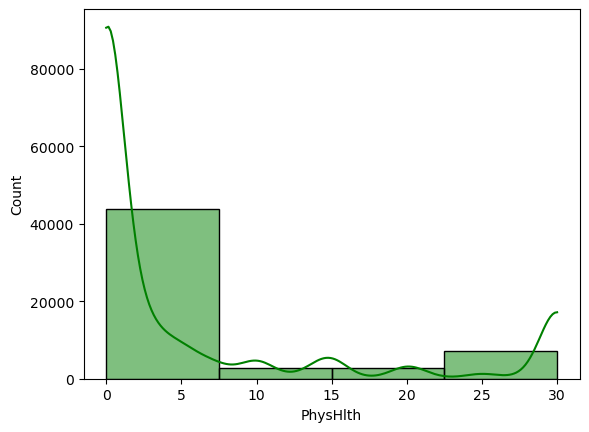

In [41]:
# Histogram for the physical health issues occurances
sns.histplot(x=Xtrain["PhysHlth"], bins=4, kde=True, color='green', edgecolor='black')


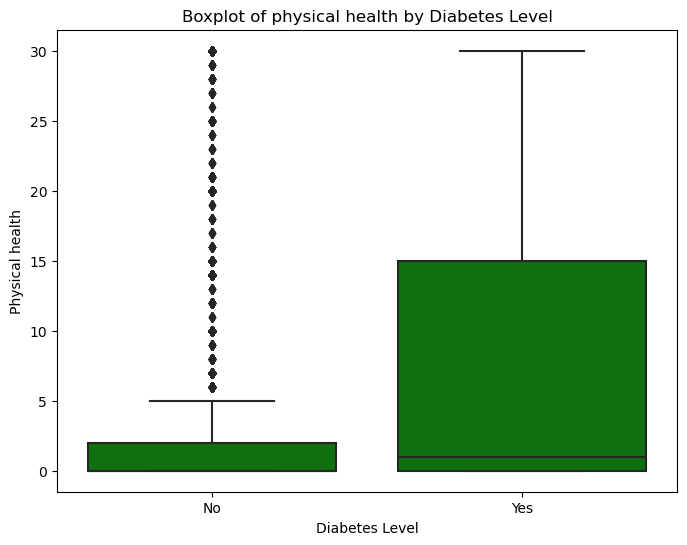

In [42]:
## boxplots of PhysHlth and Diabetes Levels
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_binary', y='PhysHlth', data=combined_df, color = 'green')

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['No', 'Yes'])
plt.xlabel('Diabetes Level')
plt.ylabel('Physical health')
plt.title('Boxplot of physical health by Diabetes Level')
plt.show()

<Axes: xlabel='PhysHlth'>

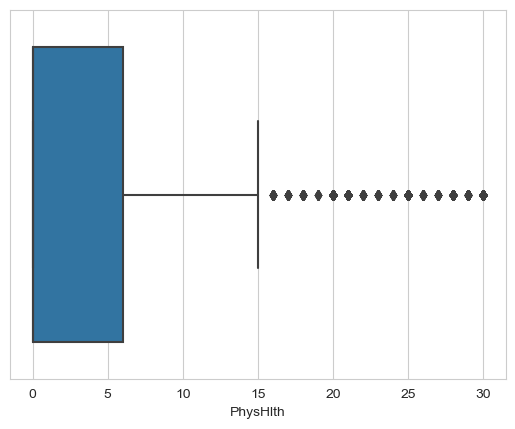

In [43]:
# Boxplot for number of physical issues occurances
sns.set_style("whitegrid") 
sns.boxplot(x=Xtrain["PhysHlth"])

<Axes: xlabel='MentHlth'>

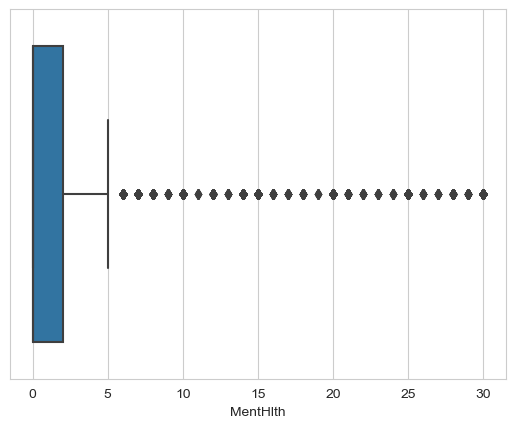

In [44]:
# Boxplot for number of physical issues occurances
sns.set_style("whitegrid") 
sns.boxplot(x=Xtrain["MentHlth"])

In [45]:
Xtrain

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
54330,1,1,1,34,0,0,0,1,1,1,...,1,0,3,0,0,0,1,3,3,1
61696,1,0,1,43,1,0,1,1,1,1,...,1,0,5,30,30,0,0,2,2,3
53756,1,1,1,38,1,0,1,0,0,1,...,1,0,4,15,30,1,1,3,2,2
31981,0,1,1,21,0,0,0,0,1,1,...,1,0,2,0,0,0,0,3,4,2
34456,0,1,1,30,0,0,0,0,0,0,...,1,0,3,0,5,0,0,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19396,1,1,1,21,0,0,0,1,0,1,...,1,0,3,5,2,0,0,3,4,2
45148,1,1,1,48,1,0,0,0,0,0,...,1,0,5,30,30,1,0,3,3,2
37483,1,1,1,39,1,0,1,1,1,0,...,1,0,1,0,30,1,1,3,4,1
56299,1,1,1,26,0,0,0,1,1,1,...,1,1,5,0,30,0,1,4,3,4


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from itertools import combinations
import scipy.stats as stats

In [ ]:
categorical_predictors = filtered

In [ ]:
Xtrain.columns

In [ ]:
Xtrain['Age']

In [ ]:
# XG Boost
xgbr = xgb.XGBClassifier()
dtrain = xgb.DMatrix(Xtrain, label=Ytrain, enable_categorical=True)

# xgboost model fit with default parameters
model = xgbr.fit(Xtrain,Ytrain)
Y_pred = model.predict(Xtest)
Y_pred_tr = model.predict(Xtrain)

from sklearn.metrics import accuracy_score
tr_accuracy = accuracy_score(Ytrain,Y_pred_tr)
ts_accuracy = accuracy_score(Ytest, Y_pred)
[tr_accuracy,ts_accuracy]

# parameter tuning with grid search
from sklearn.model_selection import train_test_split, GridSearchCV
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150,200,250,300,400,450,500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.5,0.2,0.1, 0.01, 0.001]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=5, scoring='accuracy')
model_xg = grid_search.fit(Xtrain, Ytrain)

# The best parameters - After tuning
best_params = model_xg.best_params_
best_params

best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(Xtrain,Ytrain)

Y_pred = best_xgb_model.predict(Xtest)
Y_pred_tr = best_xgb_model.predict(Xtrain)
tr_accuracy = accuracy_score(Ytrain,Y_pred_tr)
ts_accuracy = accuracy_score(Ytest, Y_pred)
[tr_accuracy,ts_accuracy]

In [ ]:
from sklearn.metrics import accuracy_score
tr_accuracy = accuracy_score(Ytrain,Y_pred_tr)
ts_accuracy = accuracy_score(Ytest, Y_pred)
[tr_accuracy,ts_accuracy]


In [ ]:
# parameter tuning with grid search
from sklearn.model_selection import train_test_split, GridSearchCV
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150,200,250,300,400,450,500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.5,0.2,0.1, 0.01, 0.001]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=5, scoring='accuracy')
model_xg = grid_search.fit(Xtrain, Ytrain)

In [ ]:
# The best parameters - After tuning
best_params = model_xg.best_params_
best_params


In [ ]:
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(Xtrain,Ytrain)

In [ ]:
Y_pred = best_model.predict(Xtest)

In [ ]:
Y_pred_tr = best_model.predict(Xtrain)

In [ ]:
tr_accuracy = accuracy_score(Ytrain,Y_pred_tr)
ts_accuracy = accuracy_score(Ytest, Y_pred)
[tr_accuracy,ts_accuracy]

In [ ]:
# Feature importance plot in xgboost
feature_importance = best_model.feature_importances_
print(feature_importance)
max(feature_importance)

In [ ]:
print(best_model.feature_importances_.argsort())

In [ ]:
sorted = best_model.feature_importances_.argsort()
print(sorted)
plt.barh(Xtrain.columns[sorted],best_model.feature_importances_[sorted])
plt.xlabel("Feature Importance")

In [ ]:
# Lasso Regression classifier
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
lasso_classifier = Lasso(alpha=0.1)

scaler = StandardScaler()
Xtrain_sc = scaler.fit_transform(Xtrain)
Xtest_sc = scaler.transform(Xtest)

lasso_classifier.fit(Xtrain_sc, Ytrain)

Y_pred = lasso_classifier.predict(Xtest_sc)
Y_pred_tr = lasso_classifier.predict(Xtrain_sc)

print(lasso_classifier.coef_)
coefficients = pd.DataFrame({'Feature': Xtrain.columns, 'Coefficient': lasso_classifier.coef_})
print(coefficients)

# Evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_ts = accuracy_score(Ytest, Y_pred.round())
accuracy_tr = accuracy_score(Ytrain, Y_pred_tr.round())
conf_matrix_ts = confusion_matrix(Ytest, Y_pred.round())
print(f"Accuracy_ts: {accuracy_ts}")
print(f"Accuracy_tr: {accuracy_tr}")
print(f"Confusion Matrix:\n{conf_matrix_ts}")

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_ts = accuracy_score(Ytest, Y_pred.round())
accuracy_tr = accuracy_score(Ytrain, Y_pred_tr.round())
conf_matrix_ts = confusion_matrix(Ytest, Y_pred.round())

print(f"Accuracy_ts: {accuracy_ts}")
print(f"Accuracy_tr: {accuracy_tr}")
print(f"Confusion Matrix:\n{conf_matrix_ts}")

In [ ]:
import pickle

filename = r'C:\Users\PC\Desktop\GroupProject_ST 3082\App\model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully.")